# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     946.3
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           2.50e-41
Time:                        15:21:06   Log-Likelihood:                 2.5119
No. Observations:                  50   AIC:                             2.976
Df Residuals:                      46   BIC:                             10.62
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0674      0.082     61.970      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.53595551  5.01617746  5.4578685   5.83474744  6.13001782  6.33912756
  6.4705168   6.54423127  6.58862879  6.63572017  6.71590994  6.85300095
  7.06028365  7.33835248  7.67500825  8.04726236  8.42511386  8.77647841
  9.07245976  9.29209721  9.42580949  9.47696888  9.46134717  9.40452438
  9.33768609  9.29249967  9.29591147  9.36571957  9.50764965  9.71441424
  9.96691006 10.23735661 10.49386044 10.70565516 10.84815624 10.90700023
 10.88040458 10.77946056 10.62631094 10.45051204 10.2841777  10.15670305
 10.089935   10.09458281 10.16845866 10.29683703 10.4548741  10.61168951
 10.73543993 10.79855081]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.76667177 10.60647115 10.33686025 10.00093554  9.65542713  9.35680926
  9.14747344  9.04534954  9.03951593  9.09287344]


## Plot comparison

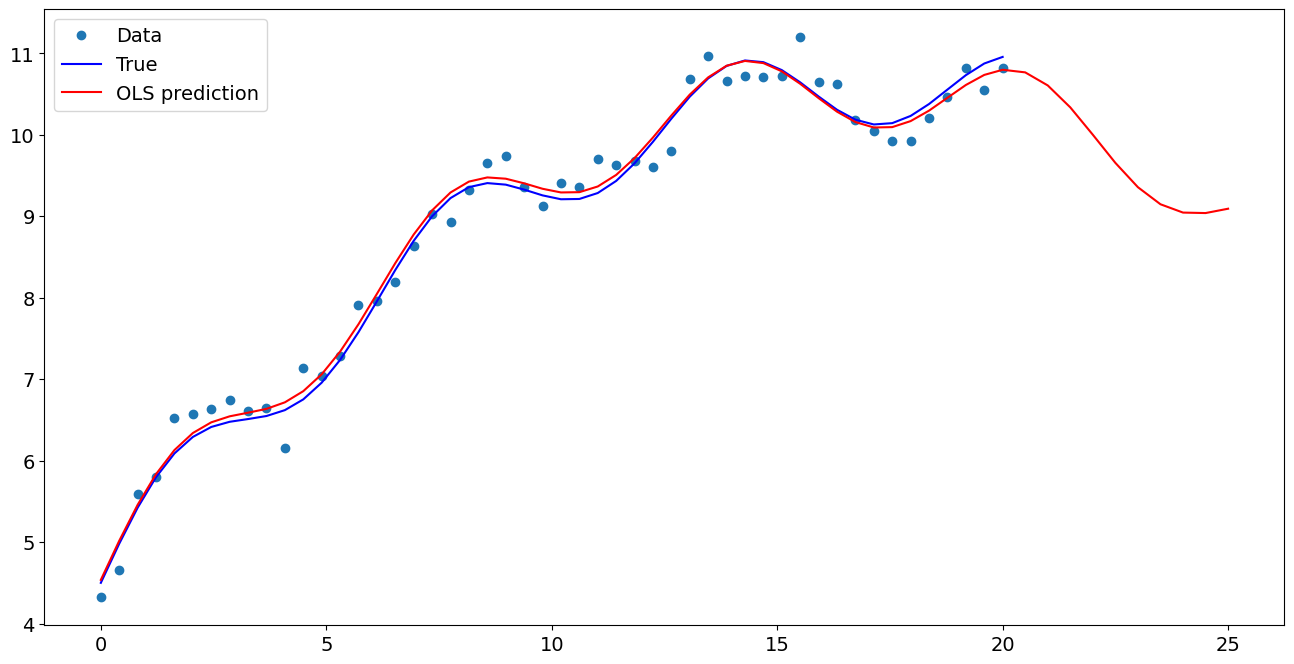

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.067393
x1                  0.503692
np.sin(x1)          0.482232
I((x1 - 5) ** 2)   -0.021258
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.766672
1    10.606471
2    10.336860
3    10.000936
4     9.655427
5     9.356809
6     9.147473
7     9.045350
8     9.039516
9     9.092873
dtype: float64